<a href="https://colab.research.google.com/github/hyeonniii/NLP/blob/main/_11_%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8%EB%A7%81(Topic_Modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 토픽 모델링(Topic Modeling)

* 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
* 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
* 예를 들어, 주제가 '개'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
* 텍스트 마이닝 기법 중에서 가장 많이 활용되는 기법 중 하나
* 대표 토픽 모델링 방법으로 잠재 의미 분석(Latent Semantic Analysis)과 잠재 디리클레 할당(Latent Dirichlet Allocation) 기법이 있음

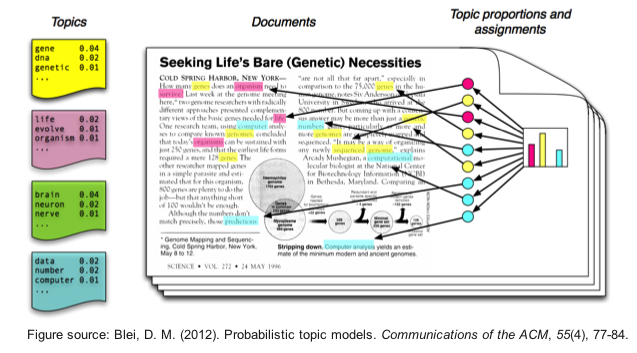

* Gensim: 벡터 변환, 토픽 모델링, 텍스트 요약 등 자연어와 텍스트마이닝 관련 여러 기능을 제공하고 있는 라이브러리

## 뉴스그룹 데이터 준비

## 잠재 의미 분석(Latent Semantic Analysis)

* 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
* 잠재 의미 인덱싱(Latent Semantic Indexing, LSI)로도 알려져 있음
* LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
* 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정
* LSA는 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)에서 단어-토픽 행렬(Term-Topic Matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽-문서 행렬(Topic-Document Matrix)로 분해

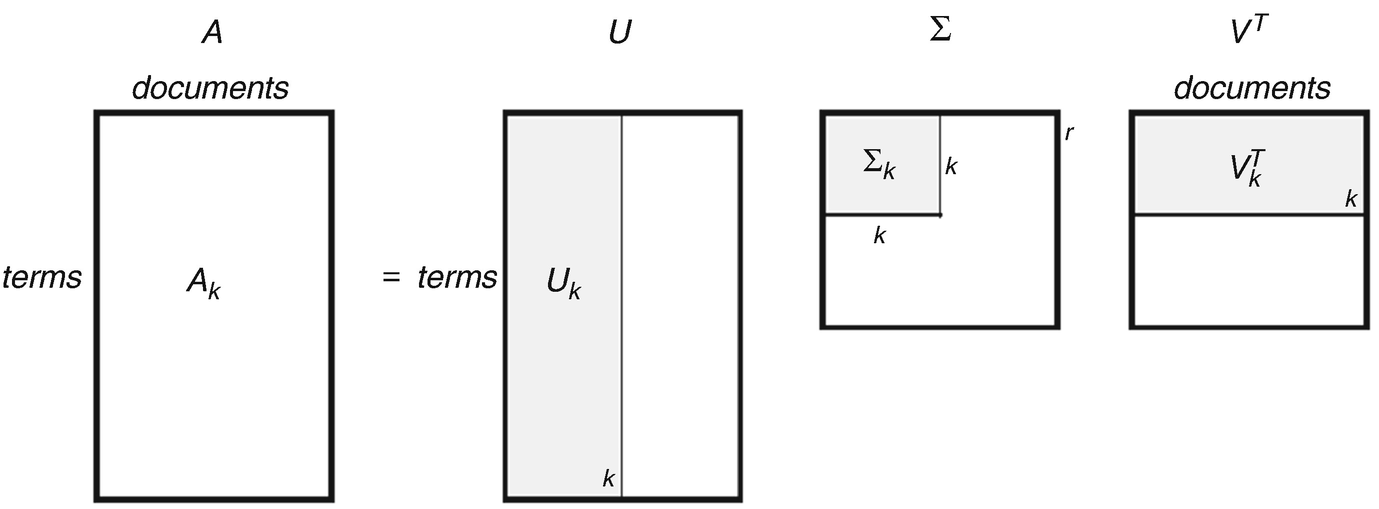

<small>Anandarajan, M., Hill, C., Nolan, T. (2019). Semantic Space Representation and Latent Semantic Analysis. In: Practical Text Analytics. Advances in Analytics and Data Science, vol 2. Springer, Cham. https://doi.org/10.1007/978-3-319-95663-3_6</small>

## 잠재 의미 분석을 위한 `LsiModel`

* 응집도(Coherence)
  * 토픽이 얼마나 의미론적으로 일관성이 있는지 판단
  * 값이 높을수록 의미론적 일관성이 높음
  * 해당 모델이 얼마나 실제로 의미있는 결과를 내는지 확인
  * 다른 외부 데이터(Corpus, Thesaurus)를 이용해 평가 진행

## 잠재 디리클레 할당(Latent Dirichlet Allocation)

* 잠재 디레클레 할당(LDA)은 대표적인 토픽 모델링  알고리즘 중 하나

* 잠재 디레클레 할당 방법
  1. 사용자가 토픽 개수를 지정해 알고리즘에 전달
  2. 모든 단어들을 토픽 중 하나에 할당
  3. 모든 문서의 모든 단어에 대해 단어 $w$가 가정에 의거, $p(t|d)$, $p(w|t)$에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미    

* $p(t|d)$: 문서 $d$의 단어들 중 토픽 $t$에 해당하는 비율, 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미    
* $p(w|t)$: 단어 w를 가지고 있는 모든 문서들 중  토픽 $t$가 할당된 비율, 다른 문서에서 단어 $w$에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

* 즉, LDA는 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합확률로 추정하여 토픽 추출

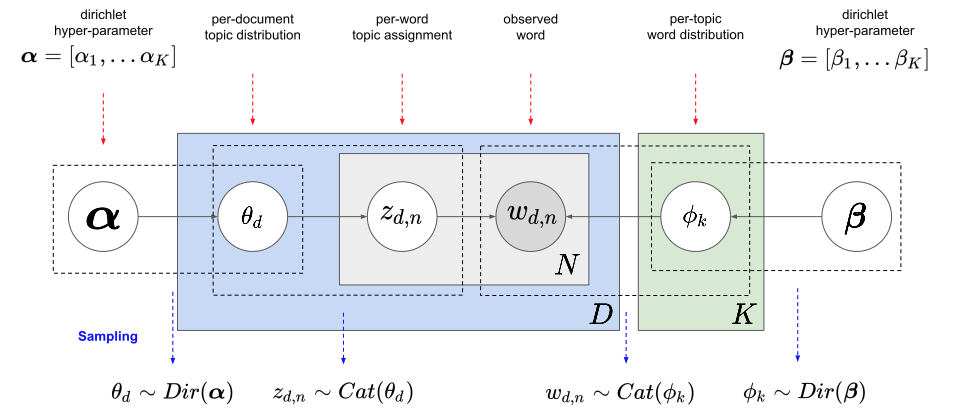

<small>그림 출처: https://donghwa-kim.github.io/lda.html</small>

* $K$: 토픽 수
* $D$: 문서 수
* $N$: 특정 문서의 단어 수
* $w_{d,n}$: 특정 문서 $d$에서 $n$번째 단어로 관측된 값
* $z_{d,n}$ topic: 특정 문서 $d$에서 $n$번째 단어에 대한 topic assignment
  * $z_{d,n}$는 Multinomial($\theta_d$)에서 샘플링 된 것($\theta_d$: Multinomial 분포의 모수)
  * Multinomial($\theta_d$)는 한번만 시행(샘플)된 것으로 Categorical($\theta_d$)와 동일
  * $\theta_d=[\theta_{d,1}, \theta_{d,2},..., \theta_{d,K}]∈\mathbb{R}^K$
  * $\sum_{k}\theta_{d, k}=1,\theta_{d, k} \geq 0$, ($k$: topic index)는 $d$번째 문서의 $Dirichlet_d$($\alpha$)에서 샘플링
  * $\alpha=[\alpha_1, \alpha_2, ..., \alpha_K]$, symmetry할 경우 $\alpha_1 = \alpha_2 =  ... = \alpha_K$
* $w_{d,n}$ word: 특정 문서 $d$에서 $n$번째 단어
  * $w_{d,n}$는 Multinomial($\beta_k$)에서 샘플링 된 것($\beta_k$: Multinomial 분포의 모수)
  * Multinomial($\phi_k$)는 한번만 시행(샘플)된 것으로 Categorical($\phi_k$)와 동일
  * $\phi_k=[\phi_{k,1},\phi_{k,2},..., \phi_{k,V}]∈\mathbb{R}^V$
  * $\sum_{i}\phi_{k, v}=1,\phi_{v, i} \geq 0$, ($v$: vocabulary index)는 $k$번째 문서의 $Dirichlet_k$($\beta$)에서 샘플링
  * $\beta=[\beta_1, \beta_2, ..., \beta_V]$, symmetry할 경우 $\beta_1 = \beta_2 =  ... = \beta_V$

## 잠재 디리클레 할당을 위한 `LdaModel`

* 혼란도(Perplexity)
  * 의미 확률 모델이 결과를 얼마나 정확하게 예측하는지 판단하는 기준
  * 토픽 모델링 기법이 얼마나 빠르게 수렴하는지 확인 가능
  * 선정된 토픽 갯수마다 학습시켜 가장 낮은 값을 보이는 구간을 찾아 최적화된 토픽 개수 선정 가능
  * 동일 모델 내에서 파라미터에 따라 성능 평가를 할 때 주로 사용
  * Perplexity가 낮다고 해서 결과 해석이 용이하다는 의미는 아님


## LDA 시각화를 위한 `pyLDAvis`

# 토픽 트렌드(Topic Trends)

* 시간에 따라 토픽의 변화 살펴보기
* 사이킷런(Scikit-learn)의 LDA를 이용한 토픽 모델링

## 뉴스 헤드라인 데이터 준비

* ABC 뉴스 헤드라인 (18년, 2003-02-19 ~ 2020-12-31)
* 뉴스 헤드라인 데이터: http://suanlab.com/datasets/abcnews-date-text.csv
* 출처: https://www.kaggle.com/therohk/million-headlines

## 청원 데이터 준비

* 청원 데이터: https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv
* 출처: https://github.com/akngs/petitions

* 한국어 자연어 처리 konlpy 라이브러리와 형태소 분석기 MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

* 혼란도(Perplexity) 계산

# BERTopic

* 신경망 토픽 모델링(Neural topic modeling)
* https://arxiv.org/pdf/2203.05794.pdf